# V471TAU

V471Tau is a eclipsing binary system member of the $625\mathrm{Myrs}$ old Hyades open cluster (Perryman et al. 1998). It is composed by a K dwarf MS star and a white dwarf.

The orbital motion of secondary star is given by:
\begin{equation} \label{eq:v_shift}
    V = K\sin\left[\frac{2\pi}{P_\mathrm{rot}}(t - t_o + \phi)\right] + v_\mathrm{rad},
\end{equation} where $K$ is the semi-amplitude, $P_\mathrm{rot}$ is the period of rotation around the primary star (the white dwarf), and $v_\mathrm{rad}$ is the radial velocity of the binary system. In this work we use the ephemeris by Guinan \& Ribas (2001), $t_o = \mathrm{HJED}\; 2440610.31752 + 0.521183398\mathrm{E}$. 

## Spectropolarimetric observations of V471Tau 

We used the ESPaDOnS instrument on the Canada France Hawaii Telescope (CFHT) to observe the K-dwarf star. ESPaDOnS collect circularly polarized spectra (Stokes $V$) and intensity spectra (Stokes $I$) covering wavelengths from $370$ to $1,000\mathrm{nm}$ at a resolving power of $65,000$ (ref. --). Data spans in two different epochs: November 2004 (three nights) and December 2005 (four nights). They correspond respectively to a total of 58 and 102 circularly polarized spectra, each one acquired in $200\mathrm{s}$ of observation. 
Least-square deconvolution (LSD) technique is applied to the stokes profiles to create a high-signal mean profile of the photospheric lines (ref. --).  We then use the zeeman-doppler imaging code to obtain brightness and magnetic maps of the star.

# Best orbital parameters

We explore the 3d-space of the orbital parameters using the intensity profile. For each set of orbital parameters, $K$, $v_\mathrm{rad}$, and $\phi$, we use the ZDI technique to reconstruct the brightness map of the star. Then, we minimize the spot coverage information got from these maps to obtain the best orbital parameters. 

## DATA IN 2004  
  \begin{equation*} \chi^2_{\mathrm{aim}} = 0.32 \end{equation*}


In [1]:
# load modules
import numpy as N
import matplotlib.pyplot as P
from scipy.optimize import leastsq
import cmocean as cm

# Read file with informations in each run
amp, phase, vrad, chisq, s, sp_ph, test, cool, hot = N.genfromtxt('/Users/bzaire/lsd/spectra/v471tau/search04/results_final.txt', unpack=True)

# Set global min of spot coverage
vmin = sp_ph.min()

#select data within the conditions:
ic = N.bitwise_and(chisq <= 0.3205, test <= 0.003)
amp = amp[ic]; phase = phase[ic]; vrad = vrad[ic]; chisq = chisq[ic]; s = s[ic]; sp_ph = sp_ph[ic] 
test = test[ic]; cool = cool[ic]; hot = hot[ic]
#we also add another condition for the data (optional):
isp = N.bitwise_and(sp_ph >= 1.00*vmin, sp_ph <= 1.20*vmin)
amp = amp[isp]; phase = phase[isp]; vrad = vrad[isp]; chisq = chisq[isp]; s = s[isp]; sp_ph = sp_ph[isp] 
test = test[isp]; cool = cool[isp]; hot = hot[isp]

## 3d minimization of sp_ph - this more accurate if we work with constant spot and then minimize chisq:
optimize_func = lambda x: x[0]*amp**2 + x[1]*vrad**2 + x[2]*phase**2 + x[3]*amp*vrad + x[4]*amp*phase \
                         + x[5]*vrad*phase + x[6]*amp + x[7]*vrad + x[8]*phase + x[9] - sp_ph
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f, g, h, i, j = coef
A = 2.*a*f - d*e; B =  2.*c*d - e*f
C = 4.*a*c - e**2; D =  d*f - 2.*b*e
E = 2.*c*g - e*i; F =  g*f - h*e
G = d**2 - 4.*a*b; H =  d*g - 2.*a*h
I = h*e - d*i; J =  f**2 - 4.*b*c
K =  f*h - 2.*b*i; L =  g*f - d*i
alpha_X = -D/J; beta_X = -(b+e*alpha_X)/(2*d)
alpha_Y = -B/C; beta_Y = -(e+c*alpha_Y)/(2*f)
alpha_Z =  A/G; beta_Z = -(c+b*alpha_Z)/(2*a)

# Best values (or the center of the paraboloid):
X_min = (D*E - B*F)/(A*B - C*D); Y_min = (A*I - B*H)/(A*D + B*G); Z_min = (D*L - A*K)/(B*D + A*J)

# 'Error  bars' - they are fake error bars because we are not minimizing chisq!: 
dX = 1./N.sqrt(2*a + 2*d*beta_X + 2*e*alpha_X + 2*b*beta_X**2 + 2*f*alpha_X*beta_X + 2*c*alpha_X**2)
dY = 1./N.sqrt(2*b + 2*f*beta_Y + 2*d*alpha_Y + 2*c*beta_Y**2 + 2*e*alpha_Y*beta_Y + 2*a*alpha_Y**2)
dZ = 1./N.sqrt(2*c + 2*e*beta_Z + 2*f*alpha_Z + 2*a*beta_Z**2 + 2*d*alpha_Z*beta_Z + 2*b*alpha_Z**2)

print(dX, dY, dZ)

10.105832932624295 1.66934292854145e-05 2.0920188973220833e-05


### results form 3d-fit in 2004:

The "error bar" is small for all the three parameters but K. The error in determining the center in the semi-amplitude direction is 10 km/s.  This is more or less expected because, due to the shape of the paraboloid (see 3D-view below), the second derivative (or curvature) of the spot coverage with respect to K is big. Maybe we can improve it by running points out of the range K = $(148, 151)$ km/s.

In [2]:
print(r'K = %3.1f, V_rad = %2.5f, and phi = %1.5f' %(X_min, Y_min, Z_min))
print(r'dK = %2.0f, dV_rad = %2.5f, and dphi = %1.5f' %(dX, dY, dZ))

K = 149.5, V_rad = 34.75809, and phi = -0.00295
dK = 10, dV_rad = 0.00002, and dphi = 0.00002


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


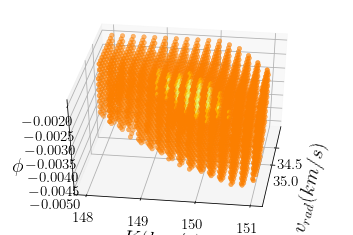

In [3]:
import matplotlib.font_manager
from mpl_toolkits.mplot3d import Axes3D
fig = P.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('Wistia', 3)
ax.scatter(vrad, amp, phase, c=sp_ph, vmin=vmin, vmax=1.02*vmin,cmap=cmap)
P.yticks([148.0, 149., 150., 151.])
P.xticks([34.5, 35.])
P.ylabel(r'$K (km/s)$', fontsize=20, labelpad=12)
P.xlabel(r'$v_{rad} (km/s)$', fontsize=20, labelpad=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\phi$', fontsize=20, rotation = 0, labelpad = 12)
ax.tick_params(axis='both', which='major', labelsize=15, direction='inout')
ax.view_init(elev=40., azim=8.)

---
---
###    2d planes passing through best values
    1) fixed semi-amplitude: K = 149.4 -- this value differs in 0.1km/s from the best value!! As we will see, it matches the value found in 2005.

In [4]:
# fixed semi-amplitude
ia = amp == 149.4
ypha = N.unique(phase[ia])
xvrad = N.unique(vrad[ia])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xvrad, ypha)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ia].shape[0]):
    indx = N.bitwise_and(y == phase[ia][i], x == vrad[ia][i])
    m_z[indx] = sp_ph[ia][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*vrad[ia]**2 + x[1]*vrad[ia] + x[2]*phase[ia]**2 + x[3]*phase[ia] \
                            + x[4]*vrad[ia]*phase[ia] + x[5] - sp_ph[ia]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('V_rad = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xvrad, ypha, optimize_func, coef, indx)

Positions of the center in this plane:
V_rad = 34.7 and phi = -0.0029


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


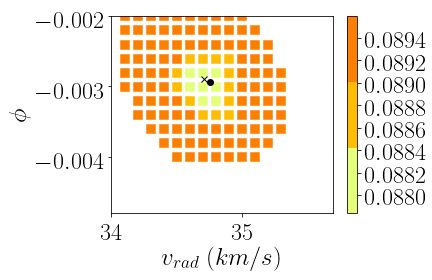

In [5]:
P.scatter(x,y,c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(Y_min, Z_min, 'o', color='k')
P.colorbar()
P.xlabel(r'$v_{rad}\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    2) fixed radial velocity: V_rad = 34.7

In [6]:
# fixed vrad
iv = vrad == 34.7

ypha = N.unique(phase[iv])
xamp = N.unique(amp[iv])

# create a mesh and create new matrix with mesh's shape
y, x = N.meshgrid(ypha, xamp)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[iv].shape[0]):
    indx = N.bitwise_and(y == phase[iv][i], x == amp[iv][i])
    m_z[indx] = sp_ph[iv][i]

mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)    
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[iv]**2 + x[1]*amp[iv] + x[2]*phase[iv]**2 + x[3]*phase[iv] \
                            + x[4]*amp[iv]*phase[iv] + x[5] - sp_ph[iv]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and phi = %1.4f' %(best_x, best_y))

Positions of the center in this plane:
K = 149.4 and phi = -0.0029


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


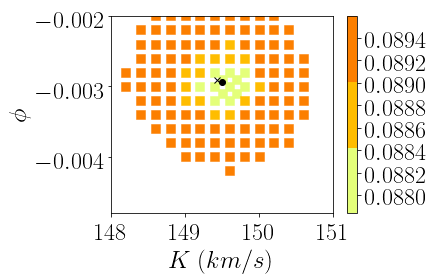

In [7]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Z_min, 'o', color='k')
#P.errorbar(X_min, Z_min, xerr=dX, yerr=dZ, fmt='-o', color='k')
P.colorbar()
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    3) fixed phase: phi = -0.0030

In [8]:
# fixed phase
ip = phase == -.0030
yvrad = N.unique(vrad[ip])
xamp = N.unique(amp[ip])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xamp, yvrad)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ia].shape[0]):
    indx = N.bitwise_and(x == amp[ip][i], y == vrad[ip][i])
    m_z[indx] = sp_ph[ip][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[ip]**2 + x[1]*amp[ip] + x[2]*vrad[ip]**2 + x[3]*vrad[ip] \
                        + x[4]*amp[ip]*vrad[ip] + x[5] - sp_ph[ip]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and V_rad = %1.1f' %(best_x, best_y))

del(yvrad, xamp, optimize_func, coef, indx)

Positions of the center in this plane:
K = 149.5 and V_rad = 34.8


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


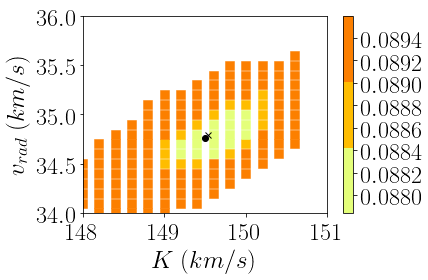

In [9]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Y_min, 'o', color='k')
P.colorbar()
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$v_{rad}\; (km/s)$')
P.tight_layout()

## DATA IN 2005  
  \begin{equation*} \chi^2_{\mathrm{aim}} = 0.32 \end{equation*}

We repeat the same procedure showed before, but for 2005.

In [10]:
# load modules
import numpy as N
import matplotlib.pyplot as P
from scipy.optimize import leastsq
import cmocean as cm

# Read file with informations in each run
amp, phase, vrad, chisq, s, sp_ph, test, cool, hot = N.genfromtxt('/Users/bzaire/lsd/spectra/v471tau/search05/results_final.txt', unpack=True)

# Set global min of spot coverage
vmin = sp_ph.min()

#select data within the conditions:
ic = N.bitwise_and(chisq <= 0.3205, test <= 0.003)
amp = amp[ic]; phase = phase[ic]; vrad = vrad[ic]; chisq = chisq[ic]; s = s[ic]
sp_ph = sp_ph[ic]; test = test[ic]; cool = cool[ic]; hot = hot[ic]
#we also add another condition for the data (optional):
isp = N.bitwise_and(sp_ph >= 1.00*vmin, sp_ph <= 1.20*vmin)
amp = amp[isp]; phase = phase[isp]; vrad = vrad[isp]; chisq = chisq[isp]; s = s[isp] 
sp_ph = sp_ph[isp]; test = test[isp]; cool = cool[isp]; hot = hot[isp]

## 3d minimization of sp_ph - this more accurate if we work with constant spot and then minimize chisq:
optimize_func = lambda x: x[0]*amp**2 + x[1]*vrad**2 + x[2]*phase**2 + x[3]*amp*vrad + x[4]*amp*phase \
                        + x[5]*vrad*phase + x[6]*amp + x[7]*vrad + x[8]*phase + x[9] - sp_ph
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f, g, h, i, j = coef
A = 2.*a*f - d*e; B =  2.*c*d - e*f
C = 4.*a*c - e**2; D =  d*f - 2.*b*e
E = 2.*c*g - e*i; F =  g*f - h*e
G = d**2 - 4.*a*b; H =  d*g - 2.*a*h
I = h*e - d*i; J =  f**2 - 4.*b*c
K =  f*h - 2.*b*i; L =  g*f - d*i
alpha_X = -D/J; beta_X = -(b+e*alpha_X)/(2*d)
alpha_Y = -B/C; beta_Y = -(e+c*alpha_Y)/(2*f)
alpha_Z =  A/G; beta_Z = -(c+b*alpha_Z)/(2*a)

# Best values (or the center of the paraboloid):
X_min = (D*E - B*F)/(A*B - C*D); Y_min = (A*I - B*H)/(A*D + B*G); Z_min = (D*L - A*K)/(B*D + A*J)

# 'Error  bars' - they are fake error bars because we are not minimizing chisq!: 
dX = 1./N.sqrt(2*a + 2*d*beta_X + 2*e*alpha_X + 2*b*beta_X**2 + 2*f*alpha_X*beta_X + 2*c*alpha_X**2)
dY = 1./N.sqrt(2*b + 2*f*beta_Y + 2*d*alpha_Y + 2*c*beta_Y**2 + 2*e*alpha_Y*beta_Y + 2*a*alpha_Y**2)
dZ = 1./N.sqrt(2*c + 2*e*beta_Z + 2*f*alpha_Z + 2*a*beta_Z**2 + 2*d*alpha_Z*beta_Z + 2*b*alpha_Z**2)

print(dX, dY, dZ)

1.6320785712216355 4.905026690516547e-06 1.9290531030184557e-05


In [11]:
print(r'K = %3.1f, V_rad = %2.5f, and phi = %1.5f' %(X_min, Y_min, Z_min))
print(r'dK = %2.0f, dV_rad = %2.5f, and dphi = %1.5f' %(dX, dY, dZ))

K = 149.3, V_rad = 34.98662, and phi = -0.00413
dK =  2, dV_rad = 0.00000, and dphi = 0.00002


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


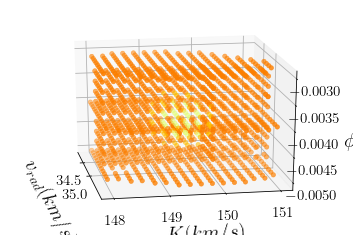

In [12]:
import matplotlib.font_manager
from mpl_toolkits.mplot3d import Axes3D
fig = P.figure()
ax = fig.add_subplot(111, projection='3d')
cmap = plt.get_cmap('Wistia', 3)
ax.scatter(vrad, amp, phase, c=sp_ph, vmin=vmin, vmax=1.02*vmin,cmap=cmap)
P.yticks([148.0, 149., 150., 151.])
P.xticks([34.5, 35.])
P.ylabel(r'$K (km/s)$', fontsize=20, labelpad=12)
P.xlabel(r'$v_{rad} (km/s)$', fontsize=20, labelpad=12)
ax.zaxis.set_rotate_label(False)
ax.set_zlabel(r'$\phi$', fontsize=20, rotation = 0, labelpad = 12)
ax.tick_params(axis='both', which='major', labelsize=15, direction='inout')
ax.view_init(elev=20., azim=-10.)

---
---
###    2d planes passing through best values
    1) fixed semi-amplitude: K = 149.4

In [13]:
# fixed semi-amplitude
ia = amp == 149.4
ypha = N.unique(phase[ia])
xvrad = N.unique(vrad[ia])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xvrad, ypha)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ia].shape[0]):
    indx = N.bitwise_and(y == phase[ia][i], x == vrad[ia][i])
    m_z[indx] = sp_ph[ia][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*vrad[ia]**2 + x[1]*vrad[ia] + x[2]*phase[ia]**2 \
                        + x[3]*phase[ia] + x[4]*vrad[ia]*phase[ia] + x[5] - sp_ph[ia]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('V_rad = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xvrad, ypha, optimize_func, coef, indx)

Positions of the center in this plane:
V_rad = 35.0 and phi = -0.0041


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


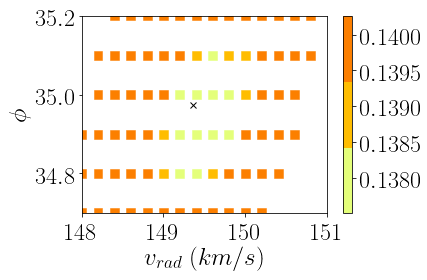

In [19]:
P.scatter(x,y,c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(Y_min, Z_min, 'o', color='k')
P.colorbar()
P.xlabel(r'$v_{rad}\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    2) fixed radial velocity: V_rad = 35.0

In [15]:
# fixed vrad
iv = vrad == 35.0

ypha = N.unique(phase[iv])
xamp = N.unique(amp[iv])

# create a mesh and create new matrix with mesh's shape
y, x = N.meshgrid(ypha, xamp)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[iv].shape[0]):
    indx = N.bitwise_and(y == phase[iv][i], x == amp[iv][i])
    m_z[indx] = sp_ph[iv][i]

mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)    
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[iv]**2 + x[1]*amp[iv] + x[2]*phase[iv]**2 \
                       + x[3]*phase[iv] + x[4]*amp[iv]*phase[iv] + x[5] - sp_ph[iv]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and phi = %1.4f' %(best_x, best_y))

del(xamp, ypha, optimize_func, coef, indx)

Positions of the center in this plane:
K = 149.4 and phi = -0.0041


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


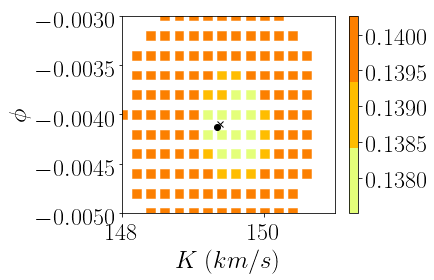

In [16]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Z_min, 'o', color='k')
#P.errorbar(X_min, Z_min, xerr=dX, yerr=dZ, fmt='-o', color='k')
P.colorbar()
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$\phi$')
P.tight_layout()

---
    3) fixed phase: phi = -0.0042

In [17]:
# fixed phase
ip = phase == -.0042
yvrad = N.unique(vrad[ip])
xamp = N.unique(amp[ip])

# create a mesh and create new matrix with mesh's shape
x, y = N.meshgrid(xamp, yvrad)
m_z = N.ones_like(x)*9999.

for i in range(sp_ph[ip].shape[0]):
    indx = N.bitwise_and(x == amp[ip][i], y == vrad[ip][i])
    m_z[indx] = sp_ph[ip][i]
    
mask = m_z > 1.08*vmin
z=N.ma.array(m_z, mask=mask)  
# find center in the 2d-plane
optimize_func = lambda x: x[0]*amp[ip]**2 + x[1]*amp[ip] + x[2]*vrad[ip]**2 + x[3]*vrad[ip] \
                        + x[4]*amp[ip]*vrad[ip] + x[5] - sp_ph[ip]
coef = leastsq(optimize_func, [1.,1.,1.,1.,1.,1.])[0]
a, b, c, d, e, f = coef.copy()
best_x = 1./(4*a*c/e - e)*(d - 2.*c*b/e)
best_y = 1./(4*a*c/e - e)*(b - 2.*a*d/e)
print('Positions of the center in this plane:')
print('K = %3.1f and V_rad = %1.1f' %(best_x, best_y))

del(yvrad, xamp, optimize_func, coef, indx)

Positions of the center in this plane:
K = 149.4 and V_rad = 35.0


/Users/bzaire/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


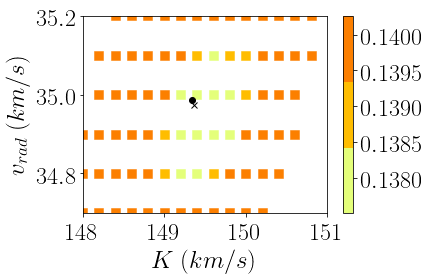

In [18]:
P.scatter(x, y, c=z, marker = 's', s=80, cmap=cmap, vmin = vmin, vmax = 1.02*vmin)
P.xlim((x.min(), x.max()))
P.ylim((y.min(), y.max()))
P.plot(best_x, best_y, 'x', color='k')
P.plot(X_min, Y_min, 'o', color='k')
P.colorbar()
P.xlabel(r'$K\; (km/s)$')
P.ylabel(r'$v_{rad}\; (km/s)$')
P.tight_layout()

# Comparison with Baptiste's approach 